In [10]:
import pandas as pd

df = pd.read_csv("taxi-fares.csv", parse_dates=["pickup_datetime"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


In [11]:
from math import sqrt

df = df[df.passenger_count == 1]
df = df.drop(["key", "passenger_count"], axis=1)

for i, row in df.iterrows():
    dt = row.pickup_datetime
    df.at[i, "day_of_week"] = dt.weekday()
    df.at[i, "pickup_time"] = dt.hour
    x = (row.dropoff_longitude - row.pickup_longitude) * 54.6
    y = (row.dropoff_latitude - row.pickup_latitude) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, "distance"] = distance

df.drop(
    [
        "pickup_datetime",
        "pickup_longitude",
        "pickup_latitude",
        "dropoff_longitude",
        "dropoff_latitude",
    ],
    axis=1,
    inplace=True,
)
df = df[(df.distance > 1.0) & (df.distance < 10.0)]
df = df[(df.fare_amount > 0) & (df.fare_amount < 50)]
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation="relu", input_dim=3))
model.add(Dense(512, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mae", metrics=["mae"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               2048      
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265217 (1.01 MB)
Trainable params: 265217 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
X = df.drop("fare_amount", axis=1)
y = df.fare_amount

hist = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 [==============================] - 0s 1ms/step - loss: 2.8686 - mae: 2.8686 - val_loss: 2.5250 - val_mae: 2.5250
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 2.4180 - mae: 2.4180 - val_loss: 2.3763 - val_mae: 2.3763
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 2.3661 - mae: 2.3661 - val_loss: 2.3685 - val_mae: 2.3685
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 2.3712 - mae: 2.3712 - val_loss: 2.3510 - val_mae: 2.3510
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 2.3707 - mae: 2.3707 - val_loss: 2.3627 - val_mae: 2.3627
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 2.3635 - mae: 2.3635 - val_loss: 2.3612 - val_mae: 2.3612
Epoch 7/100
187/187 [==============================] - 0s 1ms/step - loss: 2.3697 - mae: 2.3697 - val_loss: 2.3440 - val_mae: 2.3440
Epoch 8/100
187/187 [==============================] - 0s 1ms/step - 

[]

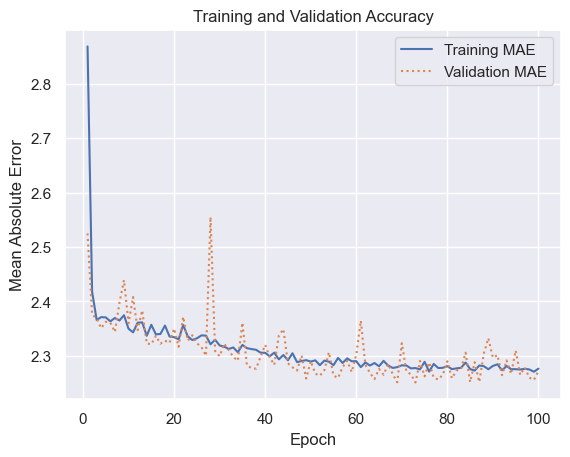

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

err = hist.history["mae"]
val_err = hist.history["val_mae"]
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, "-", label="Training MAE")
plt.plot(epochs, val_err, ":", label="Validation MAE")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="upper right")
plt.plot()

In [16]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(X))

729/729 [==============================] - 0s 301us/step


0.7388507832015594

In [17]:
import numpy as np

model.predict([[4, 17, 2.0]])

1/1 [==============================] - 0s 31ms/step


array([[10.212472]], dtype=float32)

In [18]:
model.predict([[5, 17, 2.0]])

1/1 [==============================] - 0s 25ms/step


array([[10.025325]], dtype=float32)

## Binary classification with Neural Networks

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation="relu", input_dim=3))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Training a neural network to detect credit card fraud

In [21]:
import pandas as pd

df = pd.read_csv("credit-cards.zip")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(["Time", "Class"], axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=29))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               3840      
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
hist = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100
)

Epoch 1/10
2279/2279 [==============================] - 1s 369us/step - loss: 0.0379 - accuracy: 0.9957 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 2/10
2279/2279 [==============================] - 1s 349us/step - loss: 0.0135 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9993
Epoch 3/10
2279/2279 [==============================] - 1s 349us/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 4/10
2279/2279 [==============================] - 1s 349us/step - loss: 0.0094 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 5/10
2279/2279 [==============================] - 1s 354us/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0222 - val_accuracy: 0.9991
Epoch 6/10
2279/2279 [==============================] - 1s 353us/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 7/10
2279/2279 [==============================] - 1s 349us/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0057 -

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

acc = hist.history["accuracy"]
val = hist.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

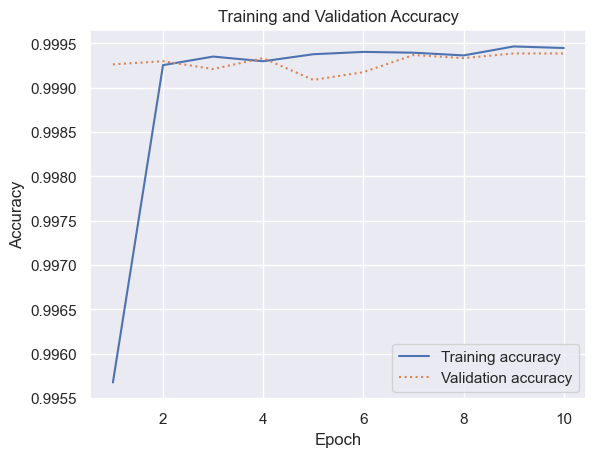

In [27]:
plt.plot(epochs, acc, "-", label="Training accuracy")
plt.plot(epochs, val, ":", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.plot();

1781/1781 [==============================] - 0s 196us/step


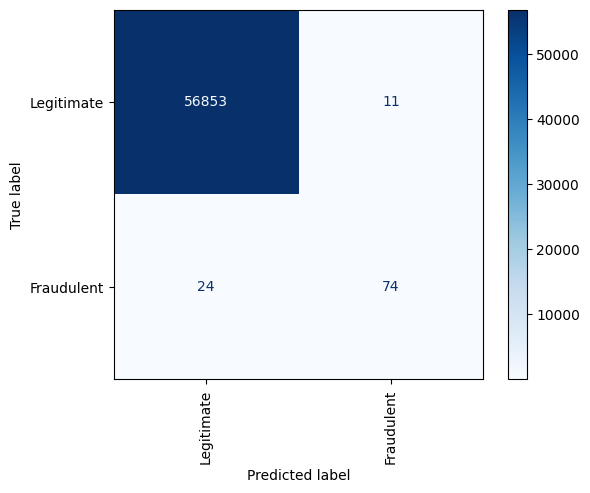

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = model.predict(X_test) > 0.5

labels = ["Legitimate", "Fraudulent"]
cmd.from_predictions(
    y_test,
    y_predicted,
    display_labels=labels,
    cmap="Blues",
    xticks_rotation="vertical",
)
plt.show()

In [57]:
hist = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=100,
    class_weight={0: 1.0, 1: 0.01},
)

Epoch 1/10
2279/2279 [==============================] - 1s 383us/step - loss: 1.5296e-04 - accuracy: 0.9991 - val_loss: 0.0084 - val_accuracy: 0.9991
Epoch 2/10
2279/2279 [==============================] - 1s 384us/step - loss: 2.0585e-04 - accuracy: 0.9990 - val_loss: 0.0118 - val_accuracy: 0.9992
Epoch 3/10
2279/2279 [==============================] - 1s 376us/step - loss: 2.1320e-04 - accuracy: 0.9989 - val_loss: 0.0577 - val_accuracy: 0.9986
Epoch 4/10
2279/2279 [==============================] - 1s 375us/step - loss: 2.6607e-04 - accuracy: 0.9988 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 5/10
2279/2279 [==============================] - 1s 375us/step - loss: 4.3738e-04 - accuracy: 0.9988 - val_loss: 0.0062 - val_accuracy: 0.9992
Epoch 6/10
2279/2279 [==============================] - 1s 376us/step - loss: 6.9845e-04 - accuracy: 0.9988 - val_loss: 0.0478 - val_accuracy: 0.9985
Epoch 7/10
2279/2279 [==============================] - 1s 373us/step - loss: 4.0771e-04 - accuracy:

In [58]:
acc = hist.history["accuracy"]
val = hist.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

In [59]:
plt.plot(epochs, acc, "-", label="Training accuracy")
plt.plot(epochs, val, ":", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.plot();

1781/1781 [==============================] - 0s 198us/step


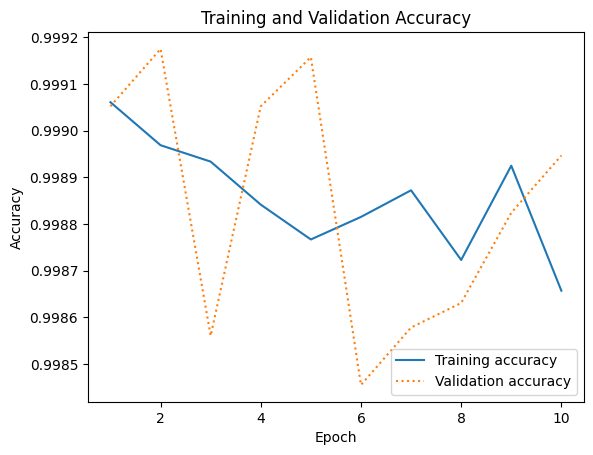

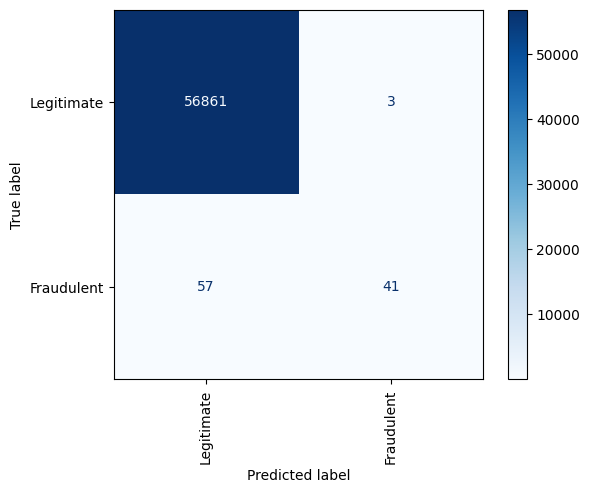

In [60]:
sns.reset_orig()
y_predicted = model.predict(X_test) > 0.5

labels = ["Legitimate", "Fraudulent"]
cmd.from_predictions(
    y_test,
    y_predicted,
    display_labels=labels,
    cmap="Blues",
    xticks_rotation="vertical",
)
plt.show()